In [1]:
%pip install ipykernel numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Постановка задачі: реалізувати одношаровий персептрон

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron as SPerceptron
from sklearn.metrics import accuracy_score

### Реалізувати одношаровий персептрон, використовуючи такі мови програмування як Python, C++

In [3]:
class PerceptronRosenblatt:
    def __init__(self, learning_rate: float = 0.01, iterations: int = 1000):
        self.learning_rate = learning_rate
        self.iterations = int(iterations)

    def predict(self, X: np.array):
        X_ = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        y_ = np.sign(self.weights @ X_.T)
        y_ = np.where(y_ == 1, self.max, self.min)
        return y_

    def fit(self, X: np.array, y: np.array):
        if len(np.unique(y)) != 2:
            raise ValueError("PerceptronRosenblatt supports only 2 classes")
        X_ = np.append(X, np.ones((X.shape[0], 1)), axis=1)
        y_ = np.zeros_like(y)
        self.max = y.max()
        self.min = y.min()
        y_ = np.where(y > self.min, 1, -1)
        self.weights = np.zeros(X_.shape[1])

        for iteration in range(self.iterations):
            for xi, target in zip(X_, y_):
                prediction = np.sign(self.weights @ xi)
                if prediction != target:
                    self.weights += self.learning_rate * target * xi


In [4]:
def fit_print(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray, model, model_name: str):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"[{model_name}] Test Accuracy: {accuracy * 100:.2f}%")
    try:
        print("[Weights]:", model.weights)
    except:
        pass

def plot(X, y, model, title: str = ""):
    plt.figure(figsize=(8, 6))
    plt.scatter(*X[y==-1].T, color='red', label='Class -1')
    plt.scatter(*X[y==1].T, color='blue', label='Class 1')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.show()


### На основі відповідного файлу (ім’я dataномер_варіанту.csv) необхідно випадковим чином сформувати навчальну та тестову вибірки (у співвідношенні 70:30). Навчити нейронну мережу на навчальній вибірці, використовуючи алгоритм Розенблатта.

In [5]:
filename = 'data/data10.csv'
df = pd.read_csv(filename, names=["X1", "X2", "y"], sep=";")
df.head()

,X1,X2,y
0,0.195,0.186,0
1,0.144,0.229,0
2,0.701,0.677,1
3,0.735,0.481,1
4,0.713,0.307,1


In [6]:
X = df.drop(columns="y").to_numpy()
y = df.y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(70, 2) (70,) (30, 2) (30,)


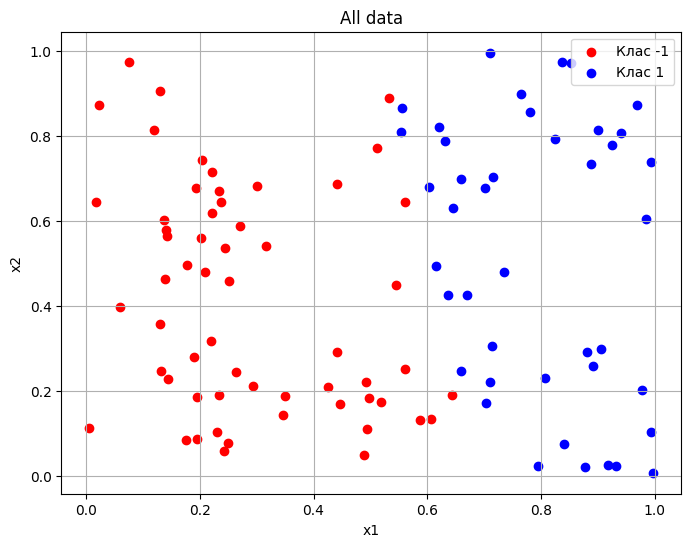

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(*X[y==y.min()].T, color='red', label='Клас -1')
plt.scatter(*X[y==y.max()].T, color='blue', label='Клас 1')
plt.title('All data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

### Перевірити роботу персептрона на тестових даних. Порівняти результати з аналогічними результатами, які отримані в результаті використання вбудованих функцій.

In [8]:
perceptron = PerceptronRosenblatt()
fit_print(X_train, y_train, X_test, y_test, perceptron, "Self")

[Self] Test Accuracy: 100.00%
[Weights]: [ 0.0427  0.0079 -0.03  ]


In [9]:
sperceptron = SPerceptron(max_iter=1000, tol=None, random_state=42)
fit_print(X_train, y_train, X_test, y_test, sperceptron, "Sklearn")
print("[Weights]:", np.append(sperceptron.coef_[0], sperceptron.intercept_))

[Sklearn] Test Accuracy: 100.00%
[Weights]: [10.009  1.879 -7.   ]


### Результати роботи оформити звітом, який має містити: постановку задачі, навчальну вибірку даних та їх представлення у графічному виді на $R^2$, результати роботи на тестовій множині даних, параметри персептрона, що навчився, вихідний код програми.

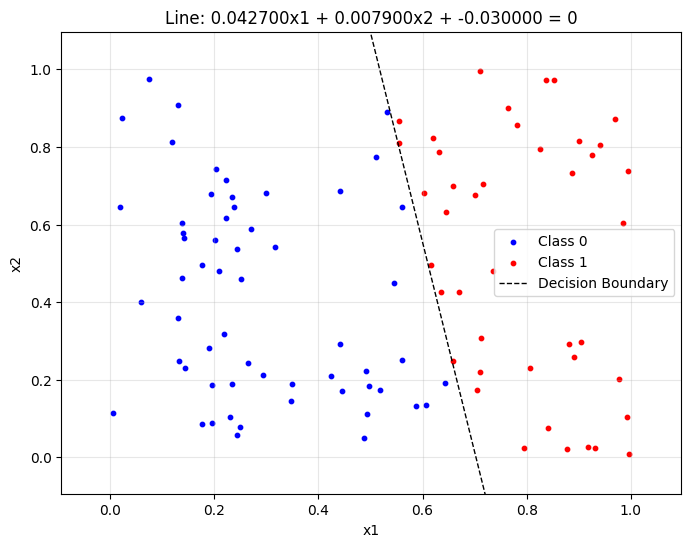

In [10]:
x_min, x_max = X.min(), X.max()
x1_values = np.linspace(x_min, x_max, 100)

w1, w2, b = perceptron.weights
x2_values = -(b + w1 * x1_values)/ w2

plt.figure(figsize=(8, 6))

plt.scatter(*X[y==0].T, s=10, color='blue', label='Class 0')
plt.scatter(*X[y==1].T, s=10, color='red', label='Class 1')

plt.plot(x1_values, x2_values, "--", color='black', linewidth=1, label='Decision Boundary')

plt.title(f'Line: {w1:.6f}x1 + {w2:.6f}x2 + {b:.6f} = 0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True, alpha=0.3)

const = 0.1
plt.xlim(x_min - const, x_max + const)
plt.ylim(x_min - const, x_max + const)

plt.show()